In [1]:
import pandas as pd
import numpy as np
ser1 = pd.Series(np.arange(4)*10)
ser1

0     0
1    10
2    20
3    30
dtype: int32

In [2]:
ser1[1:3]

1    10
2    20
dtype: int32

In [3]:
import pandas as pd
import numpy as np
index = ['a','b','c','d']
ser2 = pd.Series(np.arange(4)*10,index)
ser2

a     0
b    10
c    20
d    30
dtype: int32

In [4]:
ser2['b':'d']

b    10
c    20
d    30
dtype: int32

In [5]:
data = np.arange(16).reshape((4,4))
index = ['Ohio','Colorado','Utah','New York']
columns = ['one','two','three','four']
df1 = pd.DataFrame(data,index,columns)
df1

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [6]:
df1['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [7]:
df1.two

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [9]:
df1[['two','four']] #괄호가 2개

,two,four
Ohio,1,3
Colorado,5,7
Utah,9,11
New York,13,15


In [12]:
df1[:,2]
#순서가 있는 숫자로 받아들임

TypeError: '(slice(None, None, None), 2)' is an invalid key

In [10]:
df1[df1['three']>5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [13]:
df1

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [16]:
df1.loc['Colorado',['two','three']] # 이름(색인)으로 접근할 때 : loc

two      5
three    6
Name: Colorado, dtype: int32

In [17]:
df1.iloc[1,[1,2]] #숫자로 접근할 떄 : iloc (첫번째는 0번째임)

two      5
three    6
Name: Colorado, dtype: int32

In [20]:
df1.loc[['Colorado','Utah'],['two','three']]

,two,three
Colorado,5,6
Utah,9,10


In [21]:
df1.iloc[[1,2],[1,2]]

,two,three
Colorado,5,6
Utah,9,10


In [23]:
s1 = pd.Series([7.3,-2.5,3.4,1.5],
               index=['a','c','d','e'])
s2 = pd.Series([-2.1,3.6,-1.5,4,3.1],
               index=['a','c','e','f','g'])

In [24]:
s1 + s2 #한쪽만 있는 경우에도 NaN이 나옴

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [32]:
df1 = pd.DataFrame(np.arange(12).reshape((3,4)),
                  columns = ["a","b","c","d"])
df2 = pd.DataFrame(np.arange(20).reshape((4,5)),
                  columns = ["a","b","c","d","e"])
df2.loc[1,'b'] = np.nan
print(df1)
print(df2)

   a  b   c   d
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
    a     b   c   d   e
0   0   1.0   2   3   4
1   5   NaN   7   8   9
2  10  11.0  12  13  14
3  15  16.0  17  18  19


In [33]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [34]:
df1.add(df2) #df1 + df2와 같은 결과

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [35]:
df1.add(df2,fill_value=0) #NaN가 아니라 0.0으로 채움

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [38]:
frame = pd.DataFrame(np.random.randn(4,3),
                    columns = ["b","d","e"],
                    index = ['Utah','Ohio','Texas','Oregon']) #random으로 pandas데이터 만들기
frame 

,b,d,e
Utah,0.144411,-0.805655,0.693970
Ohio,0.195278,-0.399965,0.674678
Texas,-0.866216,1.188743,-1.337401
Oregon,-0.249231,0.024265,-0.102522


In [39]:
np.abs(frame) #12개의 데이터가 각각 절댓값 처리가 된다

,b,d,e
Utah,0.144411,0.805655,0.693970
Ohio,0.195278,0.399965,0.674678
Texas,0.866216,1.188743,1.337401
Oregon,0.249231,0.024265,0.102522


In [44]:
frame.apply(lambda x: x.max()-x.min(),
           axis='columns') #apply에 lambda함수의 객체인 f를 넣어줌(칼럼위주) / axis='columns' -> 축을 지정해줌

Utah      1.499625
Ohio      1.074643
Texas     2.526143
Oregon    0.273497
dtype: float64

In [45]:
def f(x): 
    data = [x.min(),x.max()]
    index = ['min','max']
    return pd.Series(data,index)

frame.apply(f)

,b,d,e
min,-0.866216,-0.805655,-1.337401
max,0.195278,1.188743,0.693970


In [48]:
format = lambda x:'%.2f' %x # x를 %.2f(이자리)에 출력해줘라 (소수 두째자리만 정렬해줘라)
frame.applymap(format) #applymap을 쓰는 이유는 2차원에서 이름을 맞춤(형식을 지정하는 경우) 

,b,d,e
Utah,0.14,-0.81,0.69
Ohio,0.20,-0.40,0.67
Texas,-0.87,1.19,-1.34
Oregon,-0.25,0.02,-0.10


In [50]:
frame["e"].map(format) #frame에서 특정한 columns만 지정하면 series(그냥 계산을 하는 경우)

Utah       0.69
Ohio       0.67
Texas     -1.34
Oregon    -0.10
Name: e, dtype: object

In [54]:
s3 = pd.Series([0,1,2,3],
               index=["d","a","b","c"])
s3.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [57]:
df3 = pd.DataFrame(np.arange(8).reshape((2,4)),
                   index = ["three","one"],
                   columns = ["d","a","b","c"])
df3

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [58]:
df3.sort_index() # 아스키코드

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [59]:
df3.sort_index(axis=0) #df3.sort_index()와 같은 결과

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [60]:
df3.sort_index(axis=1) #a,b,c,d가 정렬됨

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [67]:
df3.sort_index().sort_index(axis=1) #행과 열 방향 정렬
#df4 = df3.sort_index()
#df4.sort_index(axis=1)

,a,b,c,d
one,5,6,7,4
three,1,2,3,0


In [68]:
df3.sort_index(axis=1,ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [70]:
s4 = pd.Series([4,7,-3,2])
s4.sort_values()# values로 정렬하고싶을 때 -> 값들이 증가하는 방향으로 (값들로 정렬할 때)

2   -3
3    2
0    4
1    7
dtype: int64

In [71]:
s5 = pd.Series([7,-5,7,4,2,0,4])
s5.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [73]:
s5 = pd.Series([7,-5,7,4,2,0,4])
s5.rank(ascending=False,method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [75]:
s6 = pd.Series(range(5),index=['kim','kim','lee','lee','park'])
s6

kim     0
kim     1
lee     2
lee     3
park    4
dtype: int64

In [78]:
s6.index.is_unique #False -> 중복이 있다고 할 수 있음(kim이 두명,lee가 두명)

False

In [79]:
s6['kim']

kim    0
kim    1
dtype: int64

In [80]:
s6['park']?

4

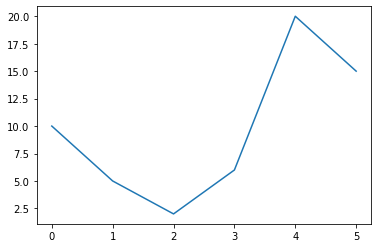

In [83]:
import matplotlib.pyplot as plt
data = [10,5,2,6,20,15]
plt.plot(data)
plt.show() #위에 title안보이게 해줌

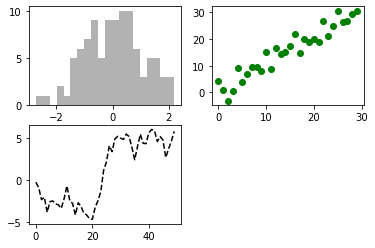

In [97]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.hist(np.random.randn(100),bins=20,color='k',alpha=0.3) #alpha는 투명도(0.3이라서 회색으로 나오는 것)

ax2 = fig.add_subplot(2,2,2)
ax2.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30),color='g')
#ax2.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30),color='r')

ax3 = fig.add_subplot(2,2,3)
ax3.plot(np.random.randn(50).cumsum(),'k--') 

In [120]:
np.random.randn(30).cumsum()

array([ 1.69576612,  1.6507534 ,  2.46017713,  3.01289489,  3.52511207,
        4.46418809,  5.64729551,  7.29671018,  7.98143948,  7.89695025,
        7.59619768,  8.18646743,  8.37049577, 10.2013714 , 10.06860694,
        9.42445698,  9.81541536, 10.62752411, 12.67628692, 12.9729256 ,
       14.66946006, 13.71601238, 13.29821782, 12.06144539, 11.23613703,
        9.36478075,  8.63915941, 10.2220496 , 11.02512019, 12.01373001])

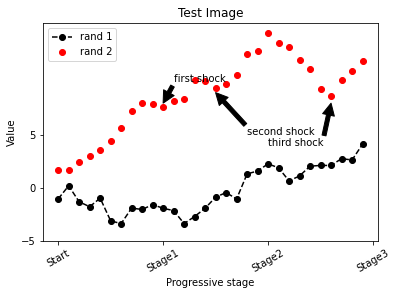

In [154]:
data1 = [-1.05799536,  0.183822  , -1.33330664, -1.79457421, -0.98661031,
       -3.13227163, -3.39379237, -1.92823212, -2.05790572, -1.5971145 ,
       -1.94359535, -2.16386546, -3.39291802, -2.72380595, -1.9433444 ,
       -0.893928  , -0.45525524, -1.06525486,  1.30809725,  1.58144573,
        2.2633622 ,  1.88175578,  0.64554454,  1.11871678,  2.04068654,
        2.10973258,  2.10597959,  2.75351425,  2.62562228,  4.11066151]
data2 = [ 1.69576612,  1.6507534 ,  2.46017713,  3.01289489,  3.52511207,
        4.46418809,  5.64729551,  7.29671018,  7.98143948,  7.89695025,
        7.59619768,  8.18646743,  8.37049577, 10.2013714 , 10.06860694,
        9.42445698,  9.81541536, 10.62752411, 12.67628692, 12.9729256 ,
       14.66946006, 13.71601238, 13.29821782, 12.06144539, 11.23613703,
        9.36478075,  8.63915941, 10.2220496 , 11.02512019, 12.01373001]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(data1,'ko--',label = "rand 1") #'ko--'에서 o는 실제 데이터를 뜻함
ax.plot(data2,'ro',label = "rand 2")
ax.legend(loc='best')
ax.set_xticks([0,10,20,30])
ax.set_xticklabels(["Start","Stage1","Stage2","Stage3"],rotation=30)
ax.set_xlabel("Progressive stage")
ax.set_yticks([-5,0,5])
ax.set_ylabel("Value")
ax.set_title("Test Image")
#ax.text(10,8,"first shock")
ax.annotate("first shock", xy=(10,8), xytext=(11,10), arrowprops=dict(facecolor='black'))
ax.annotate("second shock", xy=(15,9), xytext=(18,5), arrowprops=dict(facecolor='black'))
ax.annotate("third shock", xy=(26,8), xytext=(20,4), arrowprops=dict(facecolor='black'))
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
rect = plt.Rectangle((1.2,0.75),0.6,0.05, color='k', alpha=0.2)
cir = plt.Circle((0.7,0.2),0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15,0.15],[0.35,0.4],[0.2,0.6]], color='g', alpha=0.5)
ax.text(0.2,0.76, "This is a test sentence")
ax.add_patch(rect)
ax.add_patch(cir)
ax.add_patch(pgon)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(data1,'ko--', label ="rand 1")
plt.plot(data2,'ro', label ="rand 2")
ax.legend(loc='best')
ax.set_xticks([0,10, 20,30]) # tick - 눈금
ax.set_xticklabels(["Start","Stage1","Stage2","Stage3"], rotation=30)
ax.set_xlabel("Progressive stage")
ax.set_yticks([-5,0,5]) 
ax.set_ylabel("Value")
ax.set_title("Test Image")
ax.text(10,2,"MinJi Love")
ax.annotate("MinJi Hi",xy=(14,-6), xytext=(14,-10), arrowprops=dict(facecolor="black"))
cir = plt.Circle((14,-6),2, color='b', alpha=0.3)
ax.add_patch(cir)
pgon = plt.Polygon([[1,-1],[1,3],[9,-2]], color='g', alpha=0.3)
ax.add_patch(pgon)
plt.show()